[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sascha-senko/TensorflowCourse/blob/main/ANNwTFHW8.ipynb)

# Global TODO

(Ignore this: Only relevant for Hermann)

* Remove Autoencoder / VAE stuff

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, MaxPooling2D
from tensorflow import debugging as debug
import tensorflow_probability as tfp

## Load dataset

In [2]:
(x_train, _), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = tf.data.Dataset.from_tensor_slices(x_train)
# take only first 1000 examples
x_test = tf.data.Dataset.from_tensor_slices(x_test).take(1000)

# take only first 1000 examples
y_test = y_test[:1000]

4423680/4422102 [==============================] - 0s 0us/step


## Inspect data set

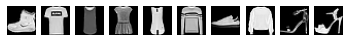

In [3]:
fig, ax = plt.subplots(1,10)

for i, img in enumerate(x_train):
    if i == 10:
        break
    ax[i].imshow(img, cmap='gray')
    ax[i].axis("off")

## Define some constants

In [4]:
# arbitrarily set. Feel free to change these
SHUFFLE_SIZE = x_test.cardinality()
PREFETCH_SIZE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64

## Prepare data

In [5]:
def process_inp(input):
    """ rescale and add channel dimension """
    # normalize between zero and one
    input = input / 255
    # add extra dimension for channel
    input = tf.expand_dims(input, -1)
    return input    



def data_pipeline(data, training):
    """ helper function for data pipeline - does all the things we need """
    
    data = data.map(process_inp)

    if training:
        data = data.shuffle(buffer_size=SHUFFLE_SIZE)

    data = data.batch(BATCH_SIZE)
    data = data.prefetch(PREFETCH_SIZE)
    return data

x_train = data_pipeline(x_train, True)
x_test = data_pipeline(x_test, False)

## Discriminator

In [6]:
class Discriminator(Model):
    # TODO: potentially change arguments
    def __init__(self, filter_size, kernel_size, embedding_size):
        super(Discriminator, self).__init__()
        raise NotImplementedError("TODO")
        # returns a vector of probabilities that the respective image was fake or real
        # Remember that the underlying idea is that the discriminator performs down-sampling. The output
        # layer should be Dense with 1 neuron and sigmoid activation, indicating whether the image was fake or
        # real

    # TODO
    def call(self, x):
        raise NotImplementedError("TODO")
        return x

### Check Discriminator

In [7]:
test_inp = next(iter(x_train))
encoder = Encoder(filter_size=16, kernel_size=[3,3], embedding_size=10) 
out = encoder(test_inp) 
check_tensor = tf.zeros(out.shape)
# Assert that output is between 0 and 1.
debug.assert_greater_equal(out, check_tensor)
debug.assert_less_equal(out, check_tensor + 1)

NameError: ignored

## Generator

In [ ]:
class Generator(Model):
    # TODO: maybe change args
    def __init__(self, dense_units, filter_size, kernel_size):
        super(Generator, self).__init__()
        raise NotImplementedError("TODO")
        
    def call(self, x):
        raise NotImplementedError("TODO")    
        return x

### Check Generator

In [ ]:
# TODO

## Helper functions

In [ ]:
# TODO: Do tf.function like in https://github.com/Spinkk/Implementing-ANNs-with-Tensorflow/blob/main/07/Autoencoder_and_Variational_Autoencoder.ipynb
# Do that with HW6 or sth like that though.
# TODO: Might break - check with HW7 
def train_step(model, input, target, loss_function, optimizer):
  # loss_object and optimizer_object are instances of respective tensorflow classes
  with tf.GradientTape() as tape:
    prediction = model(input)
    loss = loss_function(target, prediction)
    gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  return loss 

# TODO: Do tf.function like in https://github.com/Spinkk/Implementing-ANNs-with-Tensorflow/blob/main/07/Autoencoder_and_Variational_Autoencoder.ipynb
def test(model, test_data, loss_function):
  # test over complete test data

  test_loss_aggregator = []

  for (input, target) in test_data:
    prediction = model(input)
    sample_test_loss = None
    if isinstance(model, VAE):
        sample_test_loss = loss_function(target, prediction, model.losses)
    else:
        sample_test_loss = loss_function(target, prediction)
    test_loss_aggregator.append(sample_test_loss.numpy())

  test_loss = np.mean(test_loss_aggregator)

  return test_loss
  

def plot_stats(train_stat, test_stat, stat_name):
    
    plt.figure()
    line1, = plt.plot(train_stat)
    line2, = plt.plot(test_stat)
    plt.xlabel("Epochs")
    plt.ylabel(stat_name)
    plt.legend((line1, line2), ("training", "test"))
    plt.show()

## Prepare for training

In [ ]:
NUM_EPOCHS = 10
LEARNING_RATE = 0.0001   
loss = None
OPTIMIZER = tf.keras.optimizers.Adam(LEARNING_RATE)
TRAIN_STAT_DIM = (int(x_train.cardinality()))

## Train

Model: Autoencoder
Epoch: 1



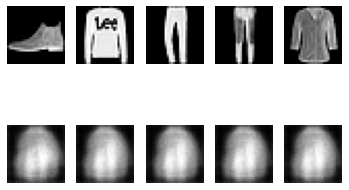

Epoch: 2



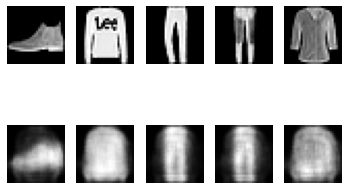

Epoch: 3



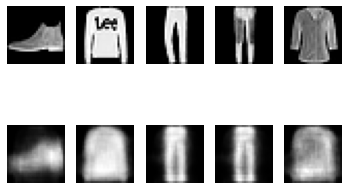

Epoch: 4



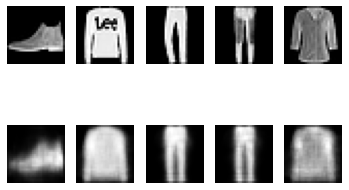

Epoch: 5



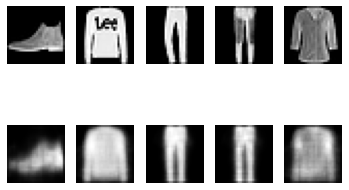

Epoch: 6



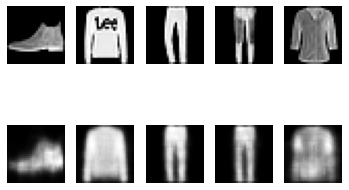

Epoch: 7



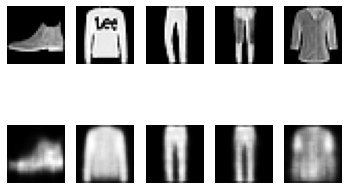

Epoch: 8



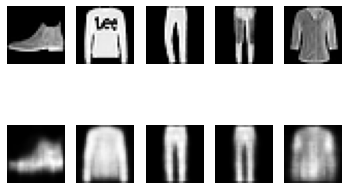

Epoch: 9



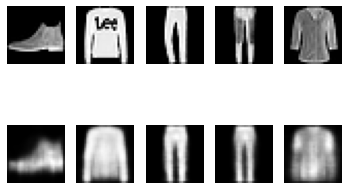

Epoch: 10



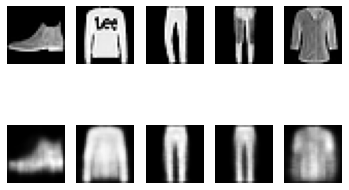

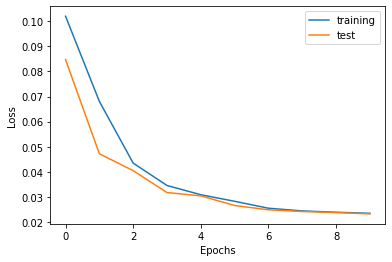

Model: VAE
Epoch: 1



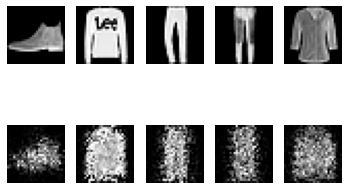

Epoch: 2



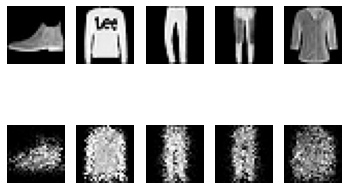

Epoch: 3



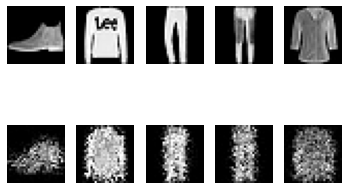

Epoch: 4



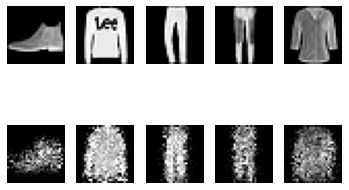

Epoch: 5



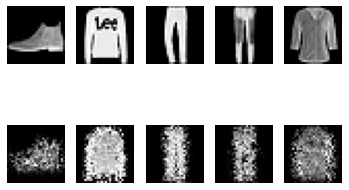

Epoch: 6



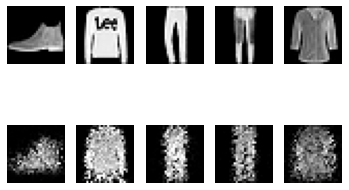

Epoch: 7



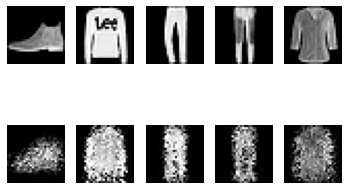

Epoch: 8



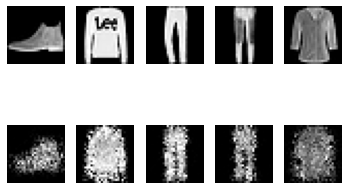

Epoch: 9



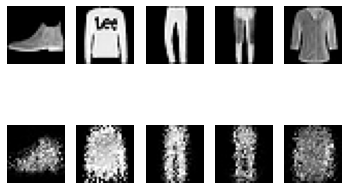

Epoch: 10



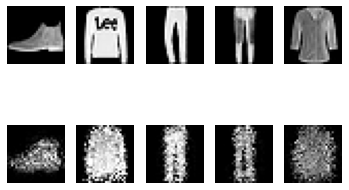

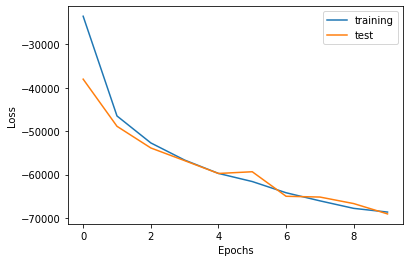

In [ ]:
# remove all active models for memory purposes
tf.keras.backend.clear_session()

# TODO
models = {'Autoencoder': Autoencoder(), 'VAE': VAE()}

losses = {'Autoencoder': tf.keras.losses.MeanSquaredError(),
          'VAE': vae_loss}

for model_name in models:

    print('Model: ' + model_name)

    model = models[model_name]
    loss = losses[model_name]

    # Initialize lists for later visualization.
    train_losses = []
    test_losses = []

    for epoch in range(NUM_EPOCHS):
        print('Epoch: ' + str(epoch+1) + "\n")

        # shuffle train data. No need to shuffle test data. Since SHUFFLE_SIZE 
        # is bigger than number of batches we will shuffle the whole set
        x_train = x_train.shuffle(buffer_size=SHUFFLE_SIZE)

        train_loss_stat = np.empty(TRAIN_STAT_DIM)

        for i, input in enumerate(x_train):
            train_loss = train_step(model, input, input, loss, OPTIMIZER)
            train_loss_stat[i] = train_loss
        train_losses.append(np.mean(train_loss_stat))

        # testing
        test_loss = test(model, zip(x_test, x_test), loss)
        test_losses.append(test_loss)

        # plot some example images from test set with counter examples
        test_batch = next(iter(x_test))

        # squeeze is needed to change shape from (28, 28, 1) to (28, 28)
        recon_batch = tf.squeeze(model(test_batch))

        if model_name == 'VAE':
            # clip, since normal distribution can also return values outside
            # of 0 and 1
            recon_batch = tf.clip_by_value(recon_batch, 0, 1)

        test_batch = tf.squeeze(test_batch)

        fig, ax = plt.subplots(2,5)

        for i in range (5):  
            ax[0, i].imshow(test_batch[i], cmap='gray')
            ax[1, i].imshow(recon_batch[i], cmap='gray')
            ax[0, i].axis("off")
            ax[1, i].axis("off")    

        plt.show()       

    # plot loss

    plot_stats(train_losses, test_losses, "Loss")